In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
!pip install riskfolio-lib
import riskfolio as rp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 16.6 MB/s eta 0:00:00


#DADOS

In [ ]:
precos = pd.read_excel('/content/agora.xlsx')
precos.rename(columns = {'Dia útil': 'du'}, inplace = True)
precos


,Ano,du,BANC,LMAG,RETC,DRWH,AQSA,SMAQ,PETN,ETF Defensivo,Índice Bolsa EW (pontos),Índice Bolsa VW (pontos),Valor do Contrato Futuro em $ (Posição Comprada),Valor do Contrato Futuro em $ (Posição Vendida)
0,-1,1,9.350164,9.319664,9.293680,9.233610,9.380863,8.920607,8.771930,100.000000,100.000000,100.000000,1000.000000,1000.000000
1,0,2,9.455677,9.500023,9.435111,9.433386,9.414986,9.126576,9.146473,101.487520,101.955933,102.400019,998.852777,1001.147223
2,0,3,9.425878,9.475236,9.345454,9.342602,9.389532,9.070888,9.109198,100.980691,101.405490,101.933366,997.346972,1002.653028
3,0,4,9.351638,9.431521,9.303607,9.308788,9.310088,8.967938,8.999259,100.419978,100.643522,101.089120,988.159780,1011.840220
4,0,5,9.492233,9.505903,9.390343,9.445942,9.415790,9.136298,9.235453,101.556741,102.133116,102.787839,999.357975,1000.642025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,5,1509,13.747470,13.720207,13.456485,14.321896,13.158863,14.439399,13.540586,147.450252,150.856776,150.505783,1012.396848,987.603152
1509,5,1510,13.601090,13.699914,13.373288,14.206691,13.077378,14.064247,13.461451,146.679168,149.430663,149.349956,1007.645865,992.354135
1510,5,1511,13.599419,13.795362,13.400121,14.328454,13.105467,14.114420,13.654085,147.545732,150.231337,150.464221,1009.516149,990.483851
1511,5,1512,13.598019,13.806793,13.329730,14.357864,13.049893,14.076437,13.591218,147.481954,149.926537,150.160389,1006.180474,993.819526


## Dataframe de retornos

In [ ]:
retornos = pd.DataFrame()
for i in ['BANC', 'RETC', 'DRWH', 'AQSA', 'PETN',]:
  retornos[i] = precos[i].pct_change().dropna()
retornos

,BANC,RETC,DRWH,AQSA,PETN
1,0.011285,0.015218,0.021636,0.003638,0.042698
2,-0.003151,-0.009503,-0.009624,-0.002704,-0.004075
3,-0.007876,-0.004478,-0.003619,-0.008461,-0.012069
4,0.015034,0.009323,0.014734,0.011354,0.026246
5,-0.007784,0.000374,-0.003044,-0.001137,0.001104
...,...,...,...,...,...
1508,-0.002076,-0.001877,0.002949,0.000022,-0.008621
1509,-0.010648,-0.006183,-0.008044,-0.006192,-0.005844
1510,-0.000123,0.002006,0.008571,0.002148,0.014310
1511,-0.000103,-0.005253,0.002053,-0.004241,-0.004604


#Markowitz

#construindo o portifolio e maximizando sharpe

In [ ]:
# Construindo o objeto de portfólio
port = rp.Portfolio(returns = retornos)

# Calculando o portfólio ótimo
# Selecionar método e estimar parâmetros de entrada:
#method_mu = 'hist' # Método para estimar retornos esperados com base em dados históricos.
#method_cov = 'hist' # Método para estimar a matriz de covariância com base em dados históricos.

# cria as estatísticas
port.assets_stats(method_mu = 'hist', method_cov = 'hist', d = 0.94)

# Estimando o portfólio ótimo:
#model = 'Classic' # Pode ser Classic (histórico), BL (Black Litterman) ou FM (Modelo de Fatores)
#rm = 'MV' # Medida de risco usada, mean-variance (média-variância)
#obj = 'Sharpe' # Função objetivo, pode ser MinRisk, MaxRet, Utility ou Sharpe
#hist = True # Usar cenários históricos para medidas de risco que dependem de cenários
rf = (1+.0405)**(1/252)-1 # Taxa livre de risco de mesmo período da janela dos ativos
#l = 0 # Fator de aversão ao risco, útil apenas quando obj é 'Utility'

# Otimização do portfólio
w = port.optimization(model = 'Classic', rm = 'MV', obj = 'Sharpe', rf = rf, l = 0, hist = True)

display(w.T)

,BANC,RETC,DRWH,AQSA,PETN
weights,0.249563,0.122264,0.537191,0.057387,0.033595


#fronteira

In [ ]:
# Gerando a fronteira eficiente
points = 100 # Número de pontos da fronteira

# Cria a variável da fronteira
frontier = port.efficient_frontier(model = 'Classic', rm = 'MV', points = points, rf = rf, hist = 'hist')

# Verifica as combinações
display(frontier.T.head())

,BANC,RETC,DRWH,AQSA,PETN
0,0.280803,0.246464,0.097905,0.374827,5.632281e-09
1,0.273831,0.211162,0.234285,0.280722,1.706804e-09
2,0.270891,0.196338,0.291508,0.241263,8.486119e-10
3,0.268614,0.184846,0.335904,0.210636,1.964165e-09
4,0.266691,0.175119,0.373714,0.184476,2.514429e-08


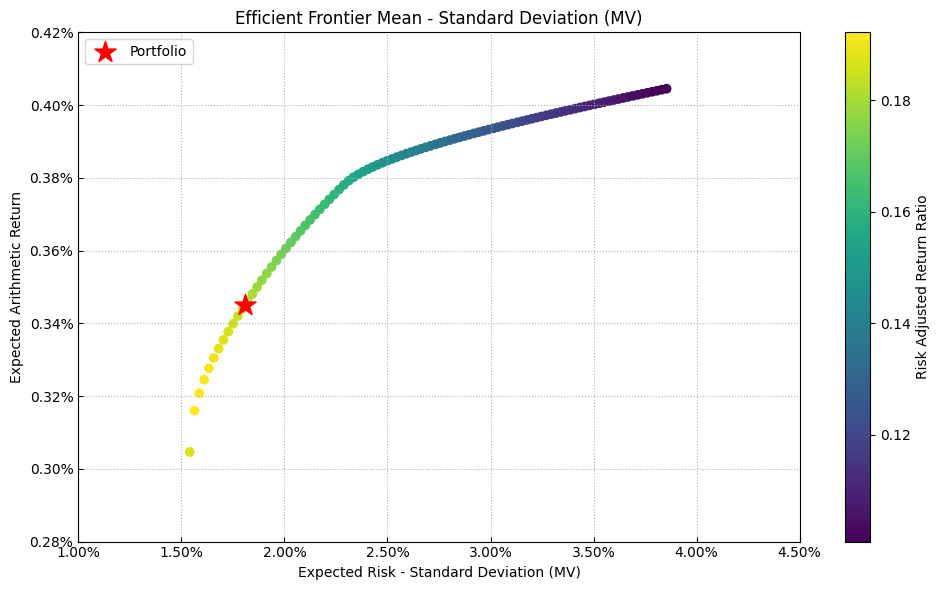

In [ ]:
# Plotando a fronteira eficiente
mu = port.mu # Retorno Esperado
cov = port.cov # Matriz de Covariância
returns = port.returns # Retorno dos ativos

# Cria o gráfico
ax = rp.plot_frontier(w_frontier = frontier, mu = mu, cov = cov, returns = returns, rm = 'MV',
                      rf=rf, alpha=0.05, cmap='viridis', w = w, s=16, c='r', height=6, width=10, ax=None, t_factor = 12)

#composição do portfolio

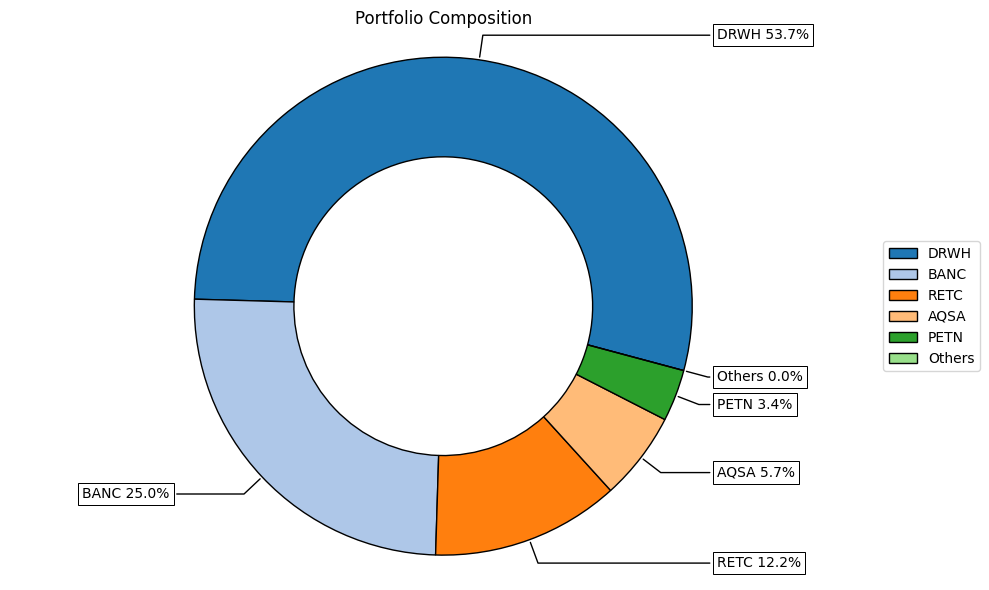

In [ ]:
# Plota a composição do Portfólio
ax = rp.plot_pie(w = w, others=0, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


##Black-Litterman

#P e Q

In [ ]:
asset_classes = {'Assets': ['BANC',
                            'RETC',
                            'DRWH',
                            'AQSA',
                            'PETN',]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Assets', 'Assets', 'Assets'],
         'Set': ['', '', ''],
         'Position': ['BANC', 'RETC','AQSA'],
         'Sign': ['>=', '>=', '>='],
         'Return': [0.0755, 0.082, 0.0451],
         'Type Relative': ['', '', ''],
         'Relative Set': ['', '', ''],
         'Relative': ['', '', '']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Return,Type Relative,Relative Set,Relative
0,False,Assets,,BANC,>=,0.0755,,,
1,False,Assets,,RETC,>=,0.0820,,,
2,False,Assets,,AQSA,>=,0.0451,,,


In [ ]:
P, Q = rp.assets_views(views, asset_classes)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,0
3,0,0,0
4,0,1,0


,0
0,0.0755
1,0.0820
2,0.0451


#portfolio

In [ ]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=0, hist=hist)

display(w_bl.T)

,BANC,RETC,DRWH,AQSA,PETN
weights,0.190566,0.423017,0.313365,0.033642,0.03941


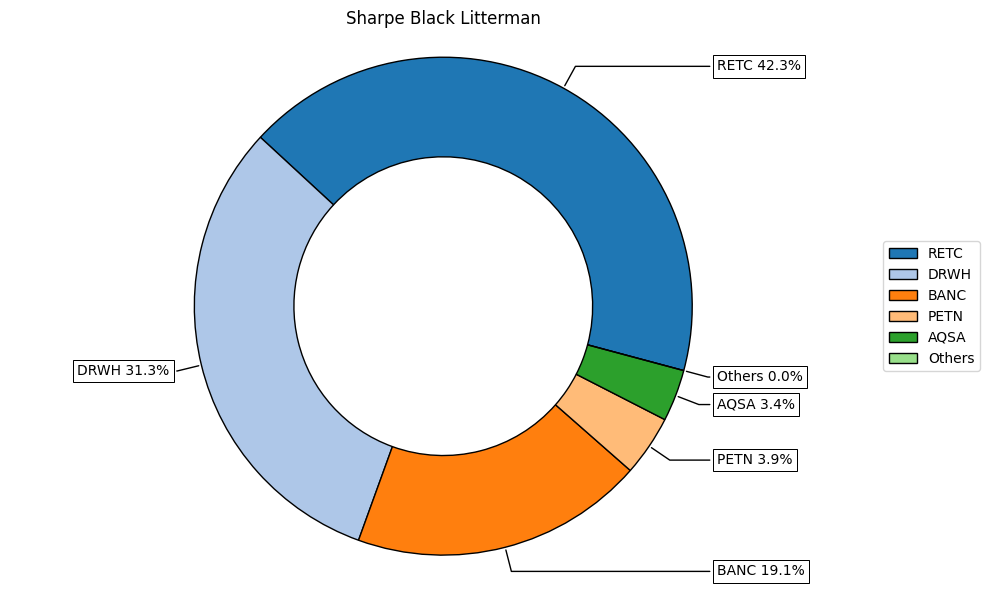

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

#fronteira eficiente

In [ ]:
points = 75 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,BANC,RETC,DRWH,AQSA,PETN
0,0.280870,0.246530,0.097886,0.374714,5.625027e-09
1,0.244974,0.329458,0.198892,0.226675,2.084591e-08
2,0.229863,0.364359,0.241469,0.164308,4.233360e-08
3,0.218078,0.391597,0.274583,0.115742,1.058889e-08
4,0.208431,0.403661,0.289445,0.085884,1.257932e-02


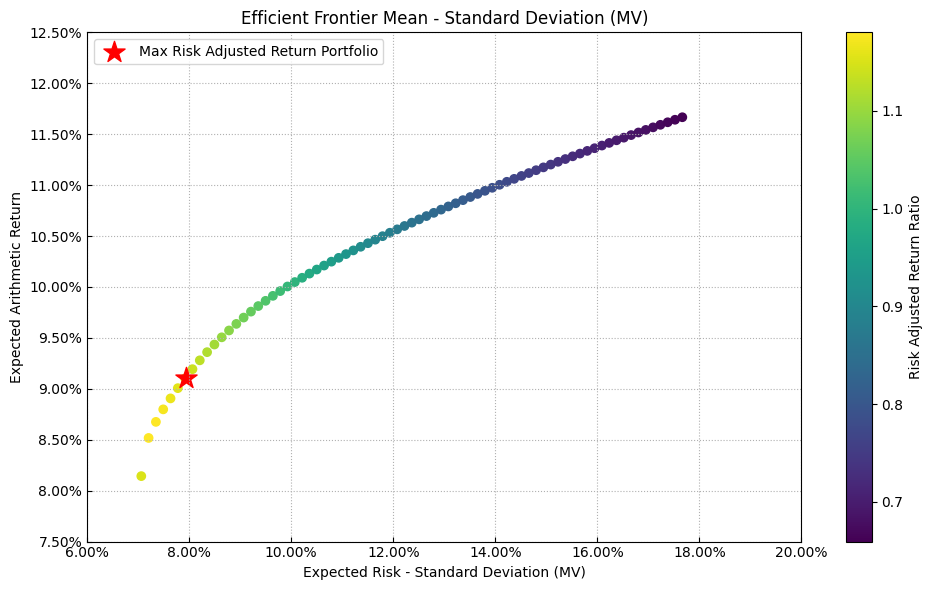

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)